<h1>Héctor Rojas Pescio - Desafio Dimensionalidad y Agrupación</h1>

<h2>Desafío 1: Lectura de archivos</h2>
<ul>
<li>Importe las librerías necesarias para el análisis factorial siguiendo las convenciones.</li>
<li>Importe la base de datos bfi.csv y asígnela a un objeto df.</li>
<li>Solicite las primeras 5 observaciones con head.</li>
<ul>   

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import seaborn as sns

import factor_analyzer as factor
import missingno as msngo

import warnings
warnings.filterwarnings(action="ignore")

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (8, 4)

In [14]:
df = pd.read_csv('bfi.csv')

In [15]:
df.head(5)

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


<h2>Desafío 2: Preprocesamiento</h2>
<ul>
<li>Elimine las columnas redundantes de la base, tal como 'Unnamed: 0'.</li>
<li>Analice el patrón de datos perdidos con missingno. Comente cuáles son las principales variables con mayores tasas de valores perdidos.</li>
<li>Genere un nuevo objeto donde almacenará la base sin valores perdidos.</li>
<ul>

In [16]:
del df['Unnamed: 0']
df.head(5)

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


In [17]:
df.shape

(2800, 28)

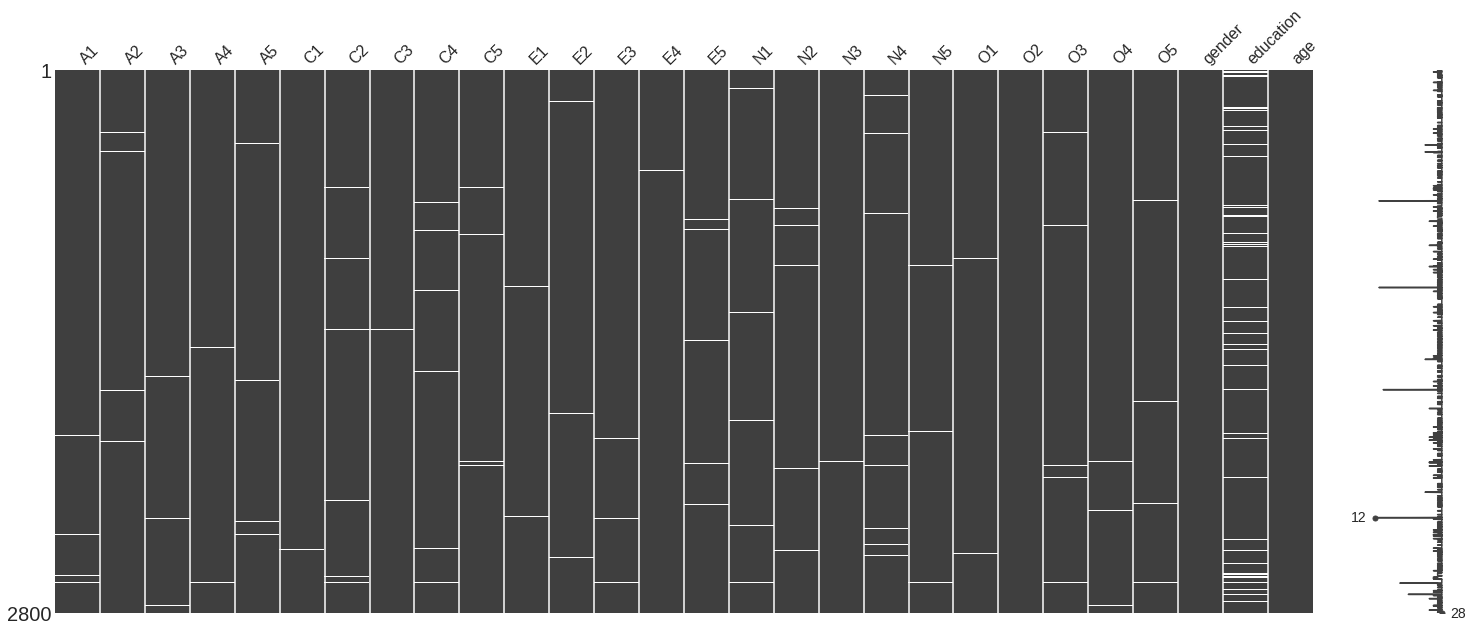

In [18]:
msngo.matrix(df, [np.nan, np.nan]);

In [19]:
def listar_observaciones_perdidas(df_obj, var_name) :
    """
    Summary of listar_observaciones_perdidas
    Cuenta el numera de datos perdidos en una observación.

    Parameters:
    df_obj: Dataframe
    var_name

    Returns:
    pandas.core.series.Series:Serie panda con nombre de observaciones, total no nulas, total nulas
    """
    df_perdidos = df_obj[var_name].isnull().value_counts()
    
    return df_perdidos

def obtener_observaciones_perdidas(df_subset) :
    """
    Summary of obtener_observaciones_perdidas
    Resumen general de datos perdidos en un dataframe.

    Parameters:
    df_subset: Dataframe a examinar
    var_name

    Returns:
    pandas.Dataframe:Dataframe panda con resumen genetal de observaciones, total no nulas, total nulas
    """
    df_op = pd.DataFrame(columns=['col_name', 'tot_nonull', 'tot_null'])
    for col in df_subset.columns :
        tf = [0.0, 0.0]
        df_tmp = listar_observaciones_perdidas(df_subset, col)
        for colname, colserie in df_tmp.iteritems() :
            if colname is False :
                tf[0] = colserie
            else :
                tf[1] = colserie
        df_op = df_op.append({'col_name': col, 'tot_nonull': tf[0], 'tot_null': tf[1]}, ignore_index=True)
    return df_op

In [20]:
df_obs_perdidas = obtener_observaciones_perdidas(df)
df_obs_perdidas.sort_values(by=['tot_nonull'], ascending=False)

,col_name,tot_nonull,tot_null
27,age,2800,0
25,gender,2800,0
21,O2,2800,0
13,E4,2791,9
17,N3,2789,11
23,O4,2786,14
9,C5,2784,16
11,E2,2784,16
0,A1,2784,16
4,A5,2784,16


<p><b>Rpta:</b> Las principales variables con datos perdidos son la pregunta education, N4, N5</p>

In [36]:
df2 = df.filter(['A1','A2','A3','A4','A5','C1','C2','C3','C4','C5','E1','E2','E3','E4','E5','N1','N2','N3','N4','N5','O1','O2','O3','O4','O5']) 
df2.dropna(inplace=True)
df.shape

(2236, 28)

<h2>Desafío 3: Descripción</h2>
<ul>
<li>Separe en un nuevo objeto DataFrame la batería de preguntas a extraer.</li>
<li>Reporte las medias para cada uno de las preguntas de la batería. Esto lo puede lograr con un dotplot.</li>
<li>Genere una matriz de correlaciones con este nuevo objeto. Visualícelo con heatmap.</li>
<li>Comente sobre los principales patrones de correlación entre las preguntas de la batería.</li>
</ul>

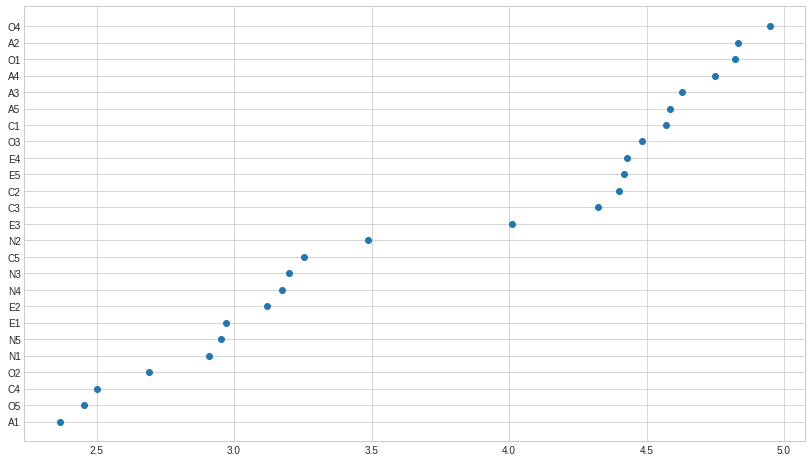

In [38]:
variable = []
mean = []

for colname, serie in df2.iteritems():
    #nombre de la variable
    variable.append(colname)
    #media
    mean.append(serie.mean())
    
df3 = pd.DataFrame({'var':variable, 'mean': mean}).sort_values(by=['mean'])

plt.figure(figsize=(14, 8))
plt.plot(df3['mean'], df3['var'],'o')

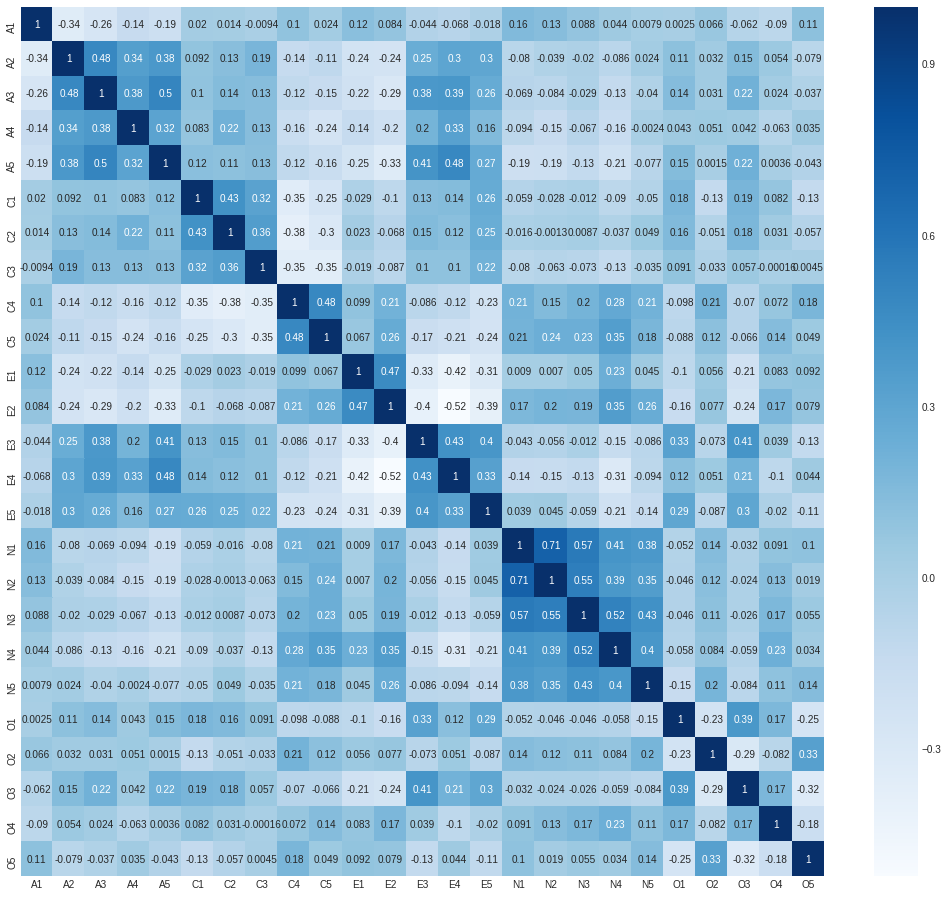

In [68]:
plt.figure(figsize=(18, 16))
sns.heatmap(df2.corr(), cmap='Blues', annot=True)

<p><b>Comentario hallazgos:</b> A partir de la matriz se identifica una correlación entre las preguntas N1 a N5 (inestabilidad emocional) y E3 a E5 (extroversión).</p>

<h2>Desafío 4: Extracción de factores</h2>
<ul>
<li>Antes de iniciar la extracción de factores, inspeccione la ideonidad de la batería de preguntas para realizar un análisis factorial mediante la prueba de esferacidad de Barlett y Kaiser-Meyer-Olkin. Comente los resultados.</li>
<li>Instancie un objeto con FactorAnalyzer() donde se estimen 10 dimensiones latentes y no se aplique rotación.</li>
<li>Genere un scree plot entre los eigenvalues del modelo y la cantidad de dimensiones estimables.</li>
<li>Refactorice el objeto con FactorAnalyzer() para incluir la cantidad de dimensiones válidas que informó el scree plot.</li>
<li>Extraiga las cargas del modelo e identifique qué items están asociados a cada factor. Comente sobre qué significa cada factor construído.</li>
</ul>

In [40]:
#Prueba de esferacidad de errores de Bartlett
import factor_analyzer as fact
fact.calculate_bartlett_sphericity(df2)

(16484.781654160415, 0.0)

<p><b>Rpta:</b> A través de los resultados (chi-cuadrado = 16484.8 y p value=0) se puede anular H0 (matriz correlaciones <> matriz identidad) por lo que se puede continuar con la análisis de los factores. </p>

In [46]:
from factor_analyzer import FactorAnalyzer

#Factorize inicial
factorize = fact.FactorAnalyzer()
factorize.analyze(data=df2, n_factors=10, method='varimax', rotation=None)

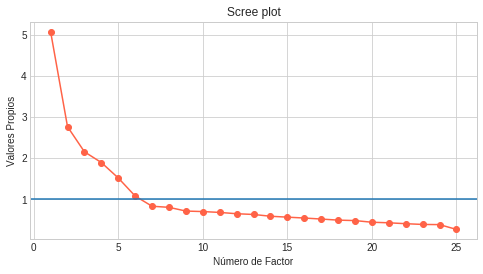

In [47]:
#Scree plot
factor_screeplot = factorize.get_eigenvalues()[0]
plt.plot(factor_screeplot.index + 1, factor_screeplot.values, 'o-', color='tomato')
plt.xlabel('Número de Factor')
plt.ylabel('Valores Propios')
plt.axhline(1)
plt.title("Scree plot");

In [48]:
#Factorize (refactorizado a 6 dimensiones)
factorize.analyze(data=df2, n_factors=6, method='varimax', rotation=None)

In [49]:
factor_loadings = factorize.loadings
factor_loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,-0.217818,-0.025323,0.147212,0.036770,-0.420779,0.294572
A2,0.455915,0.295148,-0.197899,0.120086,0.344092,-0.184539
A3,0.522146,0.305260,-0.253026,0.088980,0.273546,0.015334
A4,0.399122,0.119116,-0.152263,0.264628,0.162489,0.025393
A5,0.567112,0.183979,-0.262259,0.027891,0.166290,0.130115
C1,0.327575,0.121791,0.438554,0.147945,0.003235,0.104954
C2,0.325170,0.181309,0.454576,0.318084,0.059215,0.170916
C3,0.322018,0.046434,0.319860,0.329100,0.038197,0.037755
C4,-0.472113,0.126126,-0.451212,-0.264980,0.011658,0.264059
C5,-0.485339,0.149672,-0.261761,-0.296567,0.098866,0.052008


In [50]:
factor_loadings.applymap(lambda x: np.where(x < .4, ' ', round(x, 2)))

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
A1,,,,,,
A2,0.46,,,,,
A3,0.52,,,,,
A4,,,,,,
A5,0.57,,,,,
C1,,,0.44,,,
C2,,,0.45,,,
C3,,,,,,
C4,,,,,,
C5,,,,,,


Text(0, 0.5, 'Factor 2: 0.09')

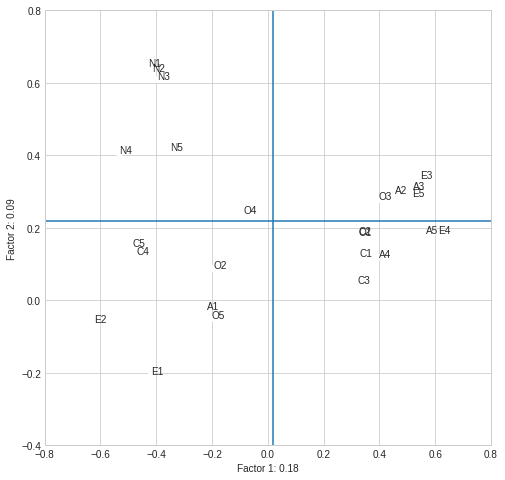

In [64]:
factor_var = factorize.get_factor_variance()

plt.figure(figsize=(8, 8))

plt.plot(factor_loadings.Factor1, factor_loadings.Factor2,'o',color='white')
plt.xlim((-.8, .8)) 
plt.ylim((-.4, .8))

for i, txt in enumerate(factor_loadings.index):    
    plt.annotate(txt, (factor_loadings['Factor1'][i], factor_loadings['Factor2'][i]))

plt.axvline(factor_loadings['Factor1'].mean())
plt.axhline(factor_loadings['Factor2'].mean())

plt.xlabel('Factor 1: {}'.format(round(factor_var['Factor1'][1], 2)))
plt.ylabel('Factor 2: {}'.format(round(factor_var['Factor2'][1], 2)))

<h2>Desafío 5: Modelación de factores</h2>

<ul>
<li>Extraiga los puntajes del modelo factorial a su base de datos.</li>
<li>Grafique la densidad de cada uno con kdplot.</li>
<li>Modele y comente brevemente sobre cuáles son los principales determinantes de cada factor en base al siguiente modelo estimable:</li>
</ul>

In [55]:
factor_var = factorize.get_factor_variance()
factor_var

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6
SS Loadings,4.553841,2.299449,1.581899,1.291149,0.957313,0.528233
Proportion Var,0.182154,0.091978,0.063276,0.051646,0.038293,0.021129
Cumulative Var,0.182154,0.274132,0.337408,0.389053,0.427346,0.448475


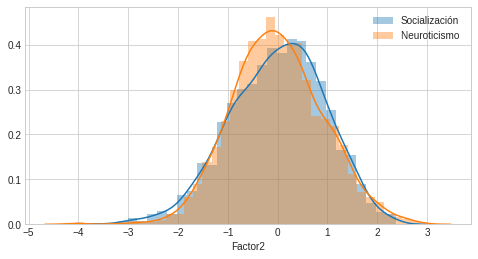

In [67]:
extract_factor_scores = factorize.get_scores(df2)
sns.distplot(extract_factor_scores.loc[:, 'Factor1'], label="Socialización")
sns.distplot(extract_factor_scores.loc[:, 'Factor2'], label="Neuroticismo ")
plt.legend()

<p><b>Rpta.</b> En concordancia con lo apreciado en la matriz de correlación, a través de la refactorización de dimensiones fue posible reducir la dimensión de la matriz de datos en dos factores:</p>
<p><b>Factor 1.</b> Agrupa las preguntas A2, A3, A5, E3, E4, E5 que hacen relacionadas a las relaciones interpersonales tales como <i>A2:Me preocupo por el bienestar de otros</i>, <i>E3: Sé como cautivar a la gente</i> lo que denota las características de Amabilidad y Extraversión. Este factor se denominó Socialización de acorde al modelo OCEAN al los resultados pertenecen.
<p><b>Factor 2.</b> A traveś del factorización fue posible identificar y agrupar las preguntas N1 a N5 como un solo factor, que efectivamente corresponde a factor N (neuroticismo o inestabilidad emocional) del modelo OCEAN.